# Google Colab Lab Assignment - LSTM

**Course Name:** Deep Learning

**Lab Title:** LSTM Time Series Forcasting

**Student Name:** Kaustubh Mahajan

**Student ID:** 202201070128

**Date of Submission:** 14-04-2025

**Group Members**: Ayush Fating, Suryansh Ambekar


**Objective**
The objective of this assignment is to explore the capabilities of Long Short-Term Memory (LSTM) networks in solving different types of sequential data problems. Specifically, the assignment focuses on:

1. Time Series Forecasting: Predicting future values of univariate time series data using LSTM models to understand trends and patterns.

2. Sequence Text Prediction: Generating coherent text sequences (characters or words) by learning language patterns from large corpora using LSTM-based generative models.

3. Text Classification: Classifying text sequences (e.g., sentiment analysis, spam detection) using LSTM to capture contextual relationships in sequential data for accurate predictions.

# **Assignment Instructions:**

# **Experiment 5.1:**
**Objective:**

To forecast future values of a univariate time series using LSTM-based models.

**Suggested Datasets:**

Daily Minimum Temperatures – Melbourne

COVID-19 Daily Cases – Our World in Data

Airline Passengers Dataset

Electricity Consumption Dataset

Stock Prices Dataset (e.g., Tesla)

Weather Data – Seattle or London

Sunspot Activity Dataset

Energy Usage – PJM Hourly Energy Consumption

Bitcoin Price Time Series

Retail Sales Forecasting – Walmart Dataset

**Expected Outcome:**

Prediction vs actual plot

RMSE/MAE values

In [ ]:
# Experiment 5.1: Time Series Forecasting using LSTM with Sunspot Activity Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Load Sunspot Dataset
df = pd.read_csv('/content/Sunspots.csv')

# Use the sunspot count column
df = df[['Monthly Mean Total Sunspot Number']]
df.columns = ['Sunspots']
data = df.values.astype('float32')

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Sequence Preparation
def create_dataset(dataset, step=1):
    X, y = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        X.append(a)
        y.append(dataset[i + step, 0])
    return np.array(X), np.array(y)

look_back = 5
X, y = create_dataset(data_scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Train/Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# Predict & Invert
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0152 - val_loss: 0.0041
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - val_loss: 0.0038
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 9/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 10/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 11/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 12/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043 - val_loss: 0.0035


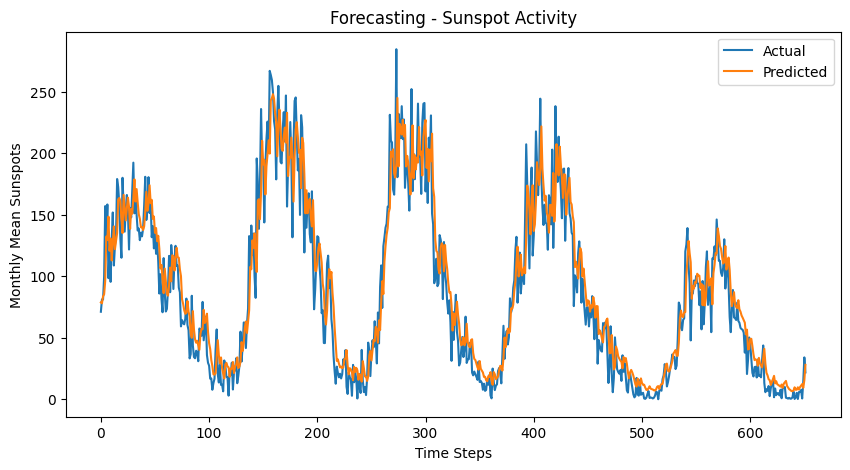

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("Forecasting - Sunspot Activity")
plt.xlabel("Time Steps")
plt.ylabel("Monthly Mean Sunspots")
plt.legend()
plt.show()

In [ ]:
# Evaluation
rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

RMSE: 23.56, MAE: 17.86


# **Experiment 5.2:**
Sequence Text Prediction using LSTM

**Objective:**

To generate next characters/words based on a given input sequence using LSTM.

**Suggested Datasets (Min 10):**

Shakespeare’s Text (TensorFlow Datasets)

Pride and Prejudice – Jane Austen (Project Gutenberg)

Harry Potter Books Dataset

Movie Dialogue Dataset (Cornell)

Reddit Jokes Dataset

Lyrics Dataset (e.g., Taylor Swift or Beatles)

Wikipedia Articles Dump

News Headline Dataset

Quora Questions Pairs

English Proverbs Dataset

**Expected Outcome:**

Auto-generated text samples

Training accuracy/loss plots

In [ ]:
import tensorflow as tf
import numpy as np
import os
import zipfile
import requests

# Step 1: Download ZIP manually and save
url = "http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip"
zip_path = tf.keras.utils.get_file("cornell.zip", origin=url)

# Step 2: Extract manually
extract_path = os.path.join(os.path.dirname(zip_path), "cornell_movie_data")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 3: Load lines from the correct path
lines_file = os.path.join(extract_path, 'cornell movie-dialogs corpus', 'movie_lines.txt')

# Step 4: Parse text data
lines = []
with open(lines_file, encoding='utf-8', errors='ignore') as f:
    for line in f:
        parts = line.strip().split(" +++$+++ ")
        if len(parts) == 5:
            lines.append(parts[4])

# Use only a small portion for quick training
text_data = "\n".join(lines[:5000])

# Step 5: Preprocessing
vocab = sorted(set(text_data))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text_data])

# Step 6: Create sequences
seq_length = 100
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

def split_input_target(chunk):
    return chunk[:-1], chunk[1:]

dataset = sequences.map(split_input_target)
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Step 7: Build model
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 512

def build_model(vocab_size, embedding_dim, rnn_units):
    return tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True),
        tf.keras.layers.Dense(vocab_size)
    ])

model = build_model(vocab_size, embedding_dim, rnn_units)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Step 8: Train model
EPOCHS = 100
steps_per_epoch = len(text_as_int) // ((seq_length + 1) * BATCH_SIZE)
history = model.fit(dataset.repeat(), epochs=EPOCHS, steps_per_epoch=steps_per_epoch)

# Step 9: Generate text
def generate_text(model, start_string="Hello", gen_length=300, temperature=0.8):
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    for _ in range(gen_length):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 3.5050
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.5428
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.2762
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.1263
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.0101
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.9283
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.8563
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.7934
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1.7514
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.6977
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.6642
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.6349
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.5968
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.5667
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - lo

In [ ]:
print(generate_text(model, "What are you doing", gen_length=200))

What are you doing?
Whe t hely!
Wenthesod s I y.. t nt. ine. Beybenken fo g.. that g ore hourshetlly t god yo igakes. be e sot qull ne de wat a t own. Riven s wase g wobasttha I ppeerengowat wht he t s w Gr anve t acel


# **Experiment 5.3:**

Sequence Text Classification using LSTM

**Objective:**

To classify text sequences using LSTM-based models (e.g., sentiment or spam detection).

**Suggested Datasets (Min 10):**

IMDb Movie Reviews (Sentiment)

SMS Spam Collection Dataset

Amazon Product Reviews

Yelp Reviews Dataset

Twitter Sentiment Analysis Dataset

Toxic Comment Classification Dataset

Sarcasm Detection Dataset (News Headlines)

BBC News Classification Dataset

Disaster Tweets Classification

Fake News Detection Dataset

**Expected Outcome:**

Classification metrics: accuracy, precision, F1-score

Confusion matrix visualization

In [ ]:
# Dataset: IMDb Movie Reviews

# Experiment 5.3: Text Classification using LSTM

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Load IMDB dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

# Build model
model = Sequential([
    Embedding(10000, 128),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12, batch_size=64)




Epoch 1/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6981 - loss: 0.5624 - val_accuracy: 0.8604 - val_loss: 0.3297
Epoch 2/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8869 - loss: 0.2836 - val_accuracy: 0.8546 - val_loss: 0.3392
Epoch 3/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9244 - loss: 0.2011 - val_accuracy: 0.8638 - val_loss: 0.3289
Epoch 4/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9512 - loss: 0.1361 - val_accuracy: 0.8658 - val_loss: 0.3461
Epoch 5/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9642 - loss: 0.1074 - val_accuracy: 0.8661 - val_loss: 0.4085
Epoch 6/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9765 - loss: 0.0723 - val_accuracy: 0.8625 - val_loss: 0.4896
Epoch 7/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9821 - loss: 0.0556 - val_accuracy: 0.8585 - val_loss: 0.5067
Epoch 8/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9842 - loss: 0.0473 - val

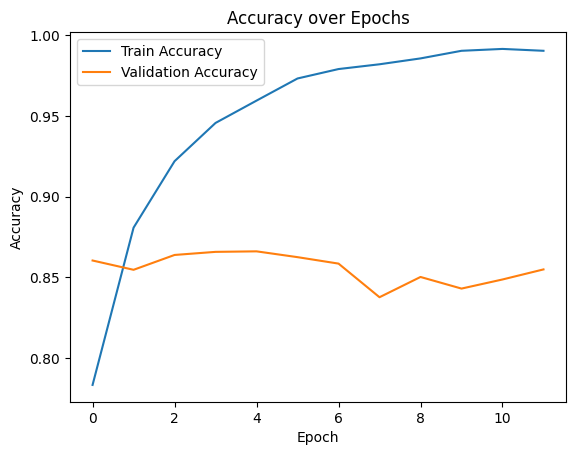

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     12500
           1       0.87      0.83      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000

F1-score: 0.8515791196203567


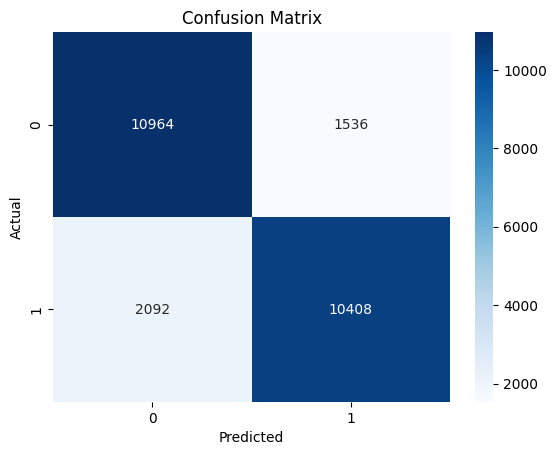

In [ ]:
# Plot training/validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Test on custom review
print("\n🧪 Testing on custom reviews...")

# Load word index
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Encode review
def encode_review(text):
    tokens = text.lower().split()
    encoded = [word_index.get(word, 2) for word in tokens]  # 2 = <UNK>
    return pad_sequences([encoded], maxlen=200)

# Try custom reviews
custom_reviews = [
    "A truly remarkable film that was both moving and thought-provoking",
    "I had a great time watching this — excellent performances and direction",
    "Unfortunately, the movie didn’t meet expectations and felt like a waste of time"
]


for review in custom_reviews:
    encoded = encode_review(review)
    prediction = model.predict(encoded)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f"\nReview: {review}")
    print(f"Predicted Sentiment: {sentiment} ({prediction:.2f})")


🧪 Testing on custom reviews...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Review: A truly remarkable film that was both moving and thought-provoking
Predicted Sentiment: Positive (0.88)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Review: I had a great time watching this — excellent performances and direction
Predicted Sentiment: Positive (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Review: Unfortunately, the movie didn’t meet expectations and felt like a waste of time
Predicted Sentiment: Negative (0.04)


✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion

Declaration

I, Ayush Fating, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [GitHub Link](hhttps://github.com/kaudrubh/AIML_Assignments)

Signature: Kaustubh Mahajan